In [194]:

#tutoraial: https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
#good ref: https://www2.bc.edu/lily-tsoi/python/cheatsheets/pandas_basics_cheatsheet.pdf
import pandas as pd
import numpy as np
data = pd.read_csv("loan.csv", index_col="ind")

In [195]:
#data.loc[1:1,['totalRevHiLim', 'totalRevHiLim_binned']]
#data[(data['totalRevHiLim']>20000) | (data['totalRevHiLim']<11000)].head()

data.loc[(data["grade"]=="B") & (data["intRate"]>=.1), ["grade","intRate","totHiCredLim","loanAmount"]].head()

,grade,intRate,totHiCredLim,loanAmount
ind,,,,
5,B,0.11,28582,"4,000.00"
8,B,0.13,178488,"16,425.00"
17,B,0.12,555629,"35,000.00"
21,B,0.13,216406,"25,000.00"
23,B,0.10,161044,"7,800.00"


In [197]:
data.dtypes

loanAmount                 object
intRate                   float64
installment               float64
grade                      object
annualInc                  object
totCurBal                  object
totalRevHiLim             float64
totHiCredLim                int64
totalBalExMort              int64
totalBcLimit                int64
totalIlHighCreditLimit      int64
Dietz                     float64
blade                      object
dtype: object

In [198]:

data = data.apply(lambda x: x.str.strip().replace(',', '', regex=True) if x.dtype == "object" else x)

In [200]:
data.head(10) #= data.apply(lambda x: x.str.replace(',', '', regex=True) if x.dtype == "object" else x)


,loanAmount,intRate,installment,grade,annualInc,totCurBal,totalRevHiLim,totHiCredLim,totalBalExMort,totalBcLimit,totalIlHighCreditLimit,Dietz,blade
ind,,,,,,,,,,,,,
1,16000.00,0.17,570.37,D,46071.55,30577.00,34300.0,34300,30577,29300,0,0.11,w
2,28000.00,0.08,879.88,A,99996.00,308327.00,64800.0,352056,43850,47500,14756,-0.91,e
3,27675.00,0.06,848.09,A,102000.00,324578.00,76400.0,388542,46920,60900,26339,0.06,r
4,28000.00,0.07,864.44,A,250000.00,501876.00,125500.0,613368,58263,55500,17584,0.05,w
5,4000.00,0.11,130.94,B,42000.00,13018.00,9600.0,28582,13018,3300,18982,0.06,e
6,9600.00,0.14,328.02,C,80000.00,167873.00,47200.0,243356,22363,39200,41018,0.13,r
7,28200.00,0.18,709.52,D,65000.00,195975.00,91300.0,229342,92380,47600,27372,-0.55,w
8,16425.00,0.13,552.24,B,40000.00,160834.00,16900.0,178488,10893,11300,6588,0.08,e
9,18000.00,0.07,552.67,A,169000.00,110277.00,64200.0,170938,110277,40400,106738,0.06,r


In [202]:

data['loanAmount']=pd.to_numeric(data['loanAmount'])
data['annualInc']=pd.to_numeric(data['annualInc'])
#data['totCurBal']=pd.to_numeric(data['totCurBal'])

In [203]:
data.dtypes

loanAmount                float64
intRate                   float64
installment               float64
grade                      object
annualInc                 float64
totCurBal                  object
totalRevHiLim             float64
totHiCredLim                int64
totalBalExMort              int64
totalBcLimit                int64
totalIlHighCreditLimit      int64
Dietz                     float64
blade                      object
dtype: object

In [204]:
data = pd.concat([
        data.select_dtypes([], ['object']),
        data.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1).reindex(data.columns, axis=1)

In [205]:
data = pd.concat([
        data.select_dtypes([], ['int64']),
        data.select_dtypes(['int64']).apply(pd.Series.astype, dtype='float64')
        ], axis=1).reindex(data.columns, axis=1)

In [206]:
data.dtypes

loanAmount                 float64
intRate                    float64
installment                float64
grade                     category
annualInc                  float64
totCurBal                 category
totalRevHiLim              float64
totHiCredLim               float64
totalBalExMort             float64
totalBcLimit               float64
totalIlHighCreditLimit     float64
Dietz                      float64
blade                     category
dtype: object

In [207]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

In [208]:

#Applying per column:
print("Missing values per column:" )
print(data.apply(num_missing, axis=0) ) #axis=0 defines that function is to be applied on each columnb

Missing values per column:
loanAmount                0
intRate                   0
installment               1
grade                     0
annualInc                 0
totCurBal                 4
totalRevHiLim             2
totHiCredLim              0
totalBalExMort            0
totalBcLimit              0
totalIlHighCreditLimit    0
Dietz                     0
blade                     0
dtype: int64


In [209]:

#First we import a function to determine the mode
from scipy.stats import mode
mode(data['totalRevHiLim'])#.mode[0]#for returning only a single value
mode(data['installment'])#.mode[0]#for returning only a single value

ModeResult(mode=array([321.13]), count=array([17]))

In [210]:

#Impute the values:
data['installment'].fillna(mode(data['installment']).mode[0], inplace=True)
data['totalRevHiLim'].fillna(mode(data['totalRevHiLim']).mode[0], inplace=True)


In [211]:

#Determine pivot table
impute_grps = data.pivot_table(values=["intRate",'Dietz'], index=["grade"], aggfunc=np.mean)
print (impute_grps)

          Dietz   intRate
grade                    
A      0.032706  0.080619
B      0.054244  0.120168
C      0.031864  0.149035
D      0.026729  0.181579
E      0.024706  0.217500
F      0.032188  0.244375
G     -0.138333  0.260000


In [212]:
#crosstab counts
pd.crosstab(data["grade"],data["blade"],margins=True)

blade,e,r,w,All
grade,,,,
A,126,131,131,388
B,232,218,205,655
C,140,144,172,456
D,96,89,81,266
E,16,28,24,68
F,12,10,10,32
G,2,3,1,6
All,624,623,624,1871


In [213]:
#rates instead of counts above:
def percConvert(ser):
  return ser/float(ser[-1])
  
pd.crosstab(data["grade"],data["blade"],margins=True).apply(percConvert, axis=1)

blade,e,r,w,All
grade,,,,
A,0.324742,0.337629,0.337629,1.0
B,0.354198,0.332824,0.312977,1.0
C,0.307018,0.315789,0.377193,1.0
D,0.360902,0.334586,0.304511,1.0
E,0.235294,0.411765,0.352941,1.0
F,0.375000,0.312500,0.312500,1.0
G,0.333333,0.500000,0.166667,1.0
All,0.333511,0.332977,0.333511,1.0


In [214]:
s1 = pd.Series([1000, 5000, 12000])
s2 = pd.Series(['e','w','r'])

prop_rates=pd.concat([s1, s2], axis=1)
prop_rates.columns = ['bladeRates','blade']
prop_rates

,bladeRates,blade
0,1000,e
1,5000,w
2,12000,r


In [215]:
type(pd.Series([1,2,3]))

pandas.core.series.Series

In [216]:

data_merged = data.merge(right=prop_rates, how='inner',left_on='blade',right_on='blade', sort=False)
data_merged.pivot_table(values='loanAmount',index=['blade','bladeRates'], aggfunc=len)

,,loanAmount
blade,bladeRates,
e,1000,624.0
r,12000,623.0
w,5000,624.0


In [217]:
data_merged

,loanAmount,intRate,installment,grade,annualInc,totCurBal,totalRevHiLim,totHiCredLim,totalBalExMort,totalBcLimit,totalIlHighCreditLimit,Dietz,blade,bladeRates
0,16000.0,0.17,570.37,D,46071.55,30577.00,34300.0,34300.0,30577.0,29300.0,0.0,0.11,w,5000
1,28000.0,0.07,864.44,A,250000.00,501876.00,125500.0,613368.0,58263.0,55500.0,17584.0,0.05,w,5000
2,28200.0,0.18,709.52,D,65000.00,195975.00,91300.0,229342.0,92380.0,47600.0,27372.0,-0.55,w,5000
3,24000.0,0.17,596.34,D,100000.00,267384.00,38400.0,289096.0,40163.0,17200.0,17596.0,-0.50,w,5000
4,24000.0,0.08,750.97,A,90000.00,291753.00,129800.0,363521.0,100538.0,77300.0,19971.0,0.07,w,5000
5,14400.0,0.21,385.53,E,60000.00,42245.00,12800.0,56503.0,42245.0,6300.0,43703.0,-0.15,w,5000
6,13475.0,0.23,379.10,E,50000.00,48868.00,16300.0,63944.0,48868.0,13600.0,47644.0,0.30,w,5000
7,4800.0,0.14,164.01,C,57000.00,11351.00,5800.0,31902.0,11351.0,5300.0,26102.0,0.12,w,5000
8,6000.0,0.18,215.63,D,30000.00,121641.00,16400.0,134255.0,11322.0,4500.0,0.0,0.15,w,5000
9,20000.0,0.07,614.08,A,82000.00,193154.00,31500.0,232604.0,53869.0,19500.0,56027.0,0.05,w,5000


In [218]:
pd.concat([data["grade"], data["blade"]], axis=1).head()

,grade,blade
ind,,
1,D,w
2,A,e
3,A,r
4,A,w
5,B,e


In [219]:
pd.concat([data["grade"], data["blade"]], axis=0).head()

ind
1    D
2    A
3    A
4    A
5    B
dtype: object

In [220]:
data_sorted = data.sort_values(['grade','loanAmount'], ascending=[True,False])
data_sorted.head(10)

,loanAmount,intRate,installment,grade,annualInc,totCurBal,totalRevHiLim,totHiCredLim,totalBalExMort,totalBcLimit,totalIlHighCreditLimit,Dietz,blade
ind,,,,,,,,,,,,,
196,35000.0,0.09,1111.37,A,96012.0,434950.00,82600.0,533161.0,117240.0,33000.0,83263.0,0.08,w
1734,35000.0,0.09,1111.37,A,122000.0,291099.00,28700.0,339692.0,51935.0,24100.0,13727.0,0.07,r
475,34000.0,0.08,1063.87,A,95440.0,283395.00,101700.0,621505.0,74987.0,92900.0,52738.0,0.06,w
1815,34000.0,0.08,1063.87,A,130580.0,106703.00,73600.0,187591.0,106703.0,71600.0,113991.0,0.04,r
964,31000.0,0.09,984.35,A,140000.0,186904.00,43700.0,206645.0,49626.0,43700.0,21949.0,0.08,w
36,30000.0,0.09,952.60,A,150000.0,566067.00,42000.0,620234.0,315941.0,42000.0,312972.0,0.08,r
355,30000.0,0.08,938.71,A,98167.0,86109.00,41300.0,165885.0,86109.0,31300.0,124585.0,0.07,w
363,30000.0,0.08,934.85,A,98500.0,452385.00,52900.0,514874.0,47781.0,28900.0,45499.0,0.04,r
1016,30000.0,0.08,934.85,A,120000.0,174957.00,107700.0,250602.0,57958.0,47700.0,0.0,0.07,e


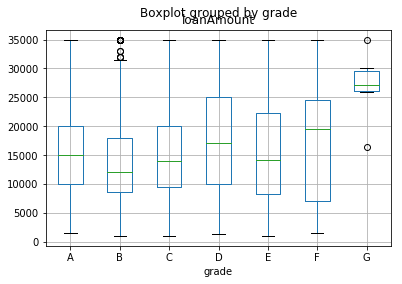

In [221]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="loanAmount",by="grade")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c662e10>,
      dtype=object)

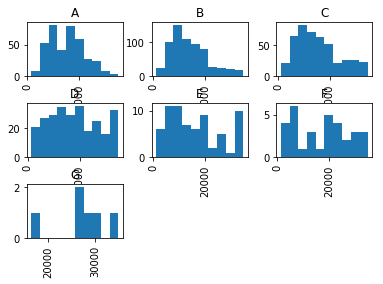

In [222]:
data.hist(column="loanAmount",by="grade",bins=10)

In [223]:
#derived / calulated columns

def bins(totalRevHiLim):
    if(totalRevHiLim<3000):
        x = "low"
    elif(totalRevHiLim<20000):
        x = "medium"
    else:
        x = 'high'
    return x


#
data['totalRevHiLim_binned'] = data.totalRevHiLim.apply(bins)

In [224]:

#looping
for index, row in data.head().iterrows():
    print(row['totalRevHiLim'])

34300.0
64800.0
76400.0
125500.0
9600.0


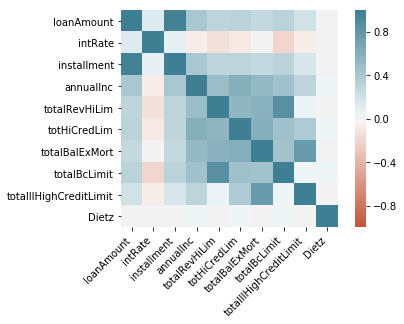

In [225]:
import seaborn as sns
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [231]:
data.dtypes

loanAmount                 float64
intRate                    float64
installment                float64
grade                     category
annualInc                  float64
totCurBal                 category
totalRevHiLim              float64
totHiCredLim               float64
totalBalExMort             float64
totalBcLimit               float64
totalIlHighCreditLimit     float64
Dietz                      float64
blade                     category
totalRevHiLim_binned        object
dtype: object

In [232]:
data = data.drop(['totCurBal'], axis=1)
wDummies = pd.get_dummies(data, columns=["grade","blade","totalRevHiLim_binned"])


In [233]:
#trainX = data.loc[:, ["intRate","totalIlHighCreditLimit","loanAmount"]]#data.loc[:, data.columns != 'Dietz']
trainX = wDummies.loc[:, wDummies.columns != 'Dietz']
trainY = data['Dietz']

In [234]:
trainX.head()

,loanAmount,intRate,installment,annualInc,totalRevHiLim,totHiCredLim,totalBalExMort,totalBcLimit,totalIlHighCreditLimit,grade_A,...,grade_D,grade_E,grade_F,grade_G,blade_e,blade_r,blade_w,totalRevHiLim_binned_high,totalRevHiLim_binned_low,totalRevHiLim_binned_medium
ind,,,,,,,,,,,,,,,,,,,,,
1,16000.0,0.17,570.37,46071.55,34300.0,34300.0,30577.0,29300.0,0.0,0,...,1,0,0,0,0,0,1,1,0,0
2,28000.0,0.08,879.88,99996.00,64800.0,352056.0,43850.0,47500.0,14756.0,1,...,0,0,0,0,1,0,0,1,0,0
3,27675.0,0.06,848.09,102000.00,76400.0,388542.0,46920.0,60900.0,26339.0,1,...,0,0,0,0,0,1,0,1,0,0
4,28000.0,0.07,864.44,250000.00,125500.0,613368.0,58263.0,55500.0,17584.0,1,...,0,0,0,0,0,0,1,1,0,0
5,4000.0,0.11,130.94,42000.00,9600.0,28582.0,13018.0,3300.0,18982.0,0,...,0,0,0,0,1,0,0,0,0,1


In [235]:
trainX.dtypes

loanAmount                     float64
intRate                        float64
installment                    float64
annualInc                      float64
totalRevHiLim                  float64
totHiCredLim                   float64
totalBalExMort                 float64
totalBcLimit                   float64
totalIlHighCreditLimit         float64
grade_A                          uint8
grade_B                          uint8
grade_C                          uint8
grade_D                          uint8
grade_E                          uint8
grade_F                          uint8
grade_G                          uint8
blade_e                          uint8
blade_r                          uint8
blade_w                          uint8
totalRevHiLim_binned_high        uint8
totalRevHiLim_binned_low         uint8
totalRevHiLim_binned_medium      uint8
dtype: object

In [236]:
#split into test train

from sklearn.ensemble import RandomForestRegressor

# Create the model with 100 trees
model = RandomForestRegressor(max_depth=2, random_state=0)
# Fit on training data
model.fit(trainX, trainY)

/Users/dbosnjakovic/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [237]:
trainX.columns

Index(['loanAmount', 'intRate', 'installment', 'annualInc', 'totalRevHiLim',
       'totHiCredLim', 'totalBalExMort', 'totalBcLimit',
       'totalIlHighCreditLimit', 'grade_A', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'blade_e', 'blade_r', 'blade_w',
       'totalRevHiLim_binned_high', 'totalRevHiLim_binned_low',
       'totalRevHiLim_binned_medium'],
      dtype='object')

In [253]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = trainX.columns,
                                    columns=['importance']).sort_values('importance',ascending=True)

<BarContainer object of 22 artists>

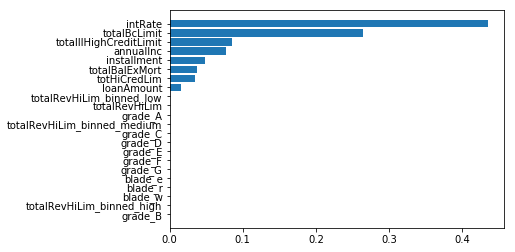

In [254]:


# Create bars
plt.barh(feature_importances.index, feature_importances["importance"])

In [261]:
o = pd.Series([1,2,5,8,"r"])

In [262]:
for x in o:
  print(x)

1
2
5
8
r
